## 521 QUIZ 1

### Indicate which string method or operator from Lecture 1 can be used to solve a given task involving strings
### Use string methods/operators to extract a specified substring
### Use boolean string methods to identify whether a word has a particular property

| method/operator                                | example         |
|------------------------------------------------|-----------------|
| `.split()`                                     | `S1.split("-")` |
| `.strip()`<br> - `.lstrip()`<br> - `.rstrip()` | `.strip(" +-")` |
| `+`                                     | "hello" + " " + "world" |
| `.join()`                                   | "-".join(List) |
| f-string                                     | f"The {noun} likes to {verb}!" |
| `.replace()`                                    | str.replace("feet","fingers") |
| `.upper()`                                    | "case".upper() |
| `.lower()`                                    | "CASE".lower() |
| `.title()`                                    | "cASE".title() |
| `.startswith("str")` (bool)                                   | S1.startswith("re") |
| `.endswith("str")`   (bool)                                 | S1.endswith("ed") |
| `in`   (bool)                                 | "red" in S1 |
| `.isupper()`   (bool)                                 | "CASE".isupper() |
| `.islower()`   (bool)                                 | 'case'.islower() |
| `.isdigit()`   (bool)                                 | '123'.isdigit() |

### Given a Python data structure involving strings (e.g. a POS-tagged sentence), collapse it to a single string using string methods

In [7]:
from nltk.corpus import brown

for word in brown.tagged_words()[:10]:
    print("/".join(word))

The/AT
Fulton/NP-TL
County/NN-TL
Grand/JJ-TL
Jury/NN-TL
said/VBD
Friday/NR
an/AT
investigation/NN
of/IN


In [12]:
" ".join(["/".join(word) for word in brown.tagged_words()[:10]])

'The/AT Fulton/NP-TL County/NN-TL Grand/JJ-TL Jury/NN-TL said/VBD Friday/NR an/AT investigation/NN of/IN'

### Convert between numeric strings and Python number types

In [13]:
int('42')

42

In [14]:
str(42)

'42'

### Know the meaning of (and relationships between) terms such as corpus, document, type, token, vocabulary, and lexicon in the context of computational linguistics

1. Corpus: a collection of documents
2. Document (D): a sequence of word tokens
3. Token: a particular instance of a type in a document
4. Type: a distinct word form, often appearing in multiple tokens across documents, corpora
5. Lexicon: a collection of word types, possibly with associated information (ex. pronunciation)
6. Vocabulary (V): a list of all word types in a corpus (a vocabulary is lexicon, but there are lots of lexicons that are not vocabulary)
7. n-grams: a fixed length sequence of words (unigram, bigram, trigram, 4-gram,...). $n$-grams also have type/token distinction

In [15]:
# corpus
brown

<CategorizedTaggedCorpusReader in '/Users/jinjin/nltk_data/corpora/brown'>

In [27]:
# document
for doc in brown.fileids()[:5]:
    print(doc)

ca01
ca02
ca03
ca04
ca05


In [25]:
brown.fileids(categories='lore')[:5]

['cf01', 'cf02', 'cf03', 'cf04', 'cf05']

In [28]:
# token
for token in brown.words()[:5]:
    print(token)

The
Fulton
County
Grand
Jury


In [30]:
# type
set(brown.words()[:5])

{'County', 'Fulton', 'Grand', 'Jury', 'The'}

In [248]:
# lexicon (POS tag lexicon)

from collections import defaultdict
POS_tag_lexicon = defaultdict(dict)

for word, pos in brown.tagged_words()[:5]:
    POS_tag_lexicon[word.lower()][pos[:2]] = POS_tag_lexicon[word.lower()].get(pos[:2], 0) + 1
    
POS_tag_lexicon

defaultdict(dict,
            {'the': {'AT': 1},
             'fulton': {'NP': 1},
             'county': {'NN': 1},
             'grand': {'JJ': 1},
             'jury': {'NN': 1}})

In [249]:
# vocabulary - list of all word types
# can be treated as a lexicon
list(set(brown.words()[:5]))

['Fulton', 'Grand', 'Jury', 'County', 'The']

In [53]:
# n grams
tokens = []
for word in brown.words()[:10]:
    tokens.append(word)

# 2-grams
for i in range(len(tokens) -1):
        print(tokens[i] + " " + tokens[i+1])

The Fulton
Fulton County
County Grand
Grand Jury
Jury said
said Friday
Friday an
an investigation
investigation of


### Explain the overall distribution of word frequencies in a typical lingusitic corpus (i.e. of the total vocabulary, how many very high frequency words are there? How many low frequency words?) 

In [69]:
from collections import Counter

counter = Counter(brown.words())

print(counter.most_common(10))
print("--------------------")
print(sorted([(count, word) for word, count in counter.items()])[:10])

[('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011)]
--------------------
[(1, '$.054/mbf'), (1, '$.07/cwt'), (1, '$.076'), (1, '$.09'), (1, '$.10-a-minute'), (1, '$.105'), (1, '$.12'), (1, '$.30'), (1, '$.30/mbf'), (1, '$.65')]


In [268]:
counter = Counter(brown.words())
counter_lower = defaultdict(int)

for key, value in counter.items():
    counter_lower[key.lower()] += value

counter_sorted_list = sorted(counter_lower.keys(), key=lambda x: counter_lower[x], reverse=True)

In [271]:
print(counter_sorted_list[-30:])

['tallow', 'crisscrossed', 'spector', 'process-server', 'grimesby', "roylott's", 'speckled', 'incubi', 'masterly', 'beggary', 'hubris', 'plumbed', 'bathos', 'besmirched', 'extremis', 'pityingly', 'horoscope', 'sidle', 'bodhisattva', 'hors', 'yaws', 'fluke', 'bilharziasis', 'perelman', 'exhaling', 'aviary', 'olive-flushed', 'coral-colored', 'boucle', 'stupefying']


- Most of the words appears once.

In [77]:
hapax_count = 0
for word, count in counter.items():
    if count == 1:
        hapax_count += 1
        
hapax_count / len(counter) * 100 # rare types are 46% of all types!

45.5946625755927

### Define Zipf's law is, and be able to describe (or identify) a graph of word frequencies in a corpus that is obeying Zipf's law

> Zipf's law: Given some corpus of natural language utterances, the frequency of any word (type) is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word

### Be able to list the key ways that corpora may vary, and give examples (you do NOT need to know the specific names of NLTK corpora for this, but you need to know the different kinds of corpora we looked at)

| Corpus                   | Description                                                                                                                                                                                                                                                            |
|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| The Brown Corpus         | - The original corpus linguistics corpus (Kučera and Francis 1967)<br>- First major machine-readable corpus<br>- 500 documents<br>- **"Balanced" corpus of 15 text genres**, used in studies of genre<br>- Huge at the time, now a bit small!                          |
| The Penn Treebank        | - Primarily **Wall Street Journal articles** from 1989<br>- 2500 documents in total<br>- Only a ~200 document sample in NLTK, full version requires LDC subscription<br>- The first large corpus with parse trees, used extensively for parsing and syntactic analysis |
| Switchboard corpus       | - 36 transcribed **telephone conversations**<br>- Calls between strangers in 1990-1<br>- Useful for study of dialogue acts                                                                                                                                             |
| Gutenberg                | - Out of copyright documents from Project Gutenberg<br>- Mostly classic literature from before 1900                                                                                                                                                                    |
| Internet-derived corpora | - 2000 movie reviews from a IMDB newsgroup (movie_reviews)<br>- 10K IM chat posts (nps_chat)<br>- Collection of various text from the web (webtext)<br>- Sample of tweets (twitter_samples)                                                                            |

### Know what a word cloud is, and what the size of words in word clouds indicate

- An easy way of visualizing text data.
- The size of a word reflects its frequency.

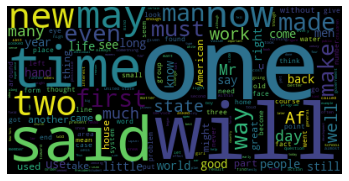

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = brown.words()[:50]
wordcloud = WordCloud().generate(" ".join(brown.words()))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Define a corpus annotation, and be able to give some examples from the NLTK corpora

- A corpus annotation: labels for documents in the corpus.

1. Categories
    - the Brown : genres
    - the Movie Review : polarity (pos or neg)

In [87]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [91]:
for category in brown.categories():
    print(brown.words(categories = category))

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]
['Northern', 'liberals', 'are', 'the', 'chief', ...]
['Assembly', 'session', 'brought', 'much', 'good', ...]
['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', ...]
['The', 'Office', 'of', 'Business', 'Economics', '(', ...]
['Too', 'often', 'a', 'beginning', 'bodybuilder', ...]
['It', 'was', 'among', 'these', 'that', 'Hinkle', ...]
['1', '.', 'Introduction', 'It', 'has', 'recently', ...]
['In', 'American', 'romance', ',', 'almost', 'nothing', ...]
['There', 'were', 'thirty-eight', 'patients', 'on', ...]
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
['As', 'a', 'result', ',', 'although', 'we', 'still', ...]
['It', 'is', 'not', 'news', 'that', 'Nathan', ...]
['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...]
['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]


2. POS (part-of-speech)

In [93]:
print(brown.tagged_words()[0])
print(brown.tagged_words(tagset='universal')[0])

('The', 'AT')
('The', 'DET')


### Explain why sets are better for lexicons that lists

- The simpliest lexicon is just a list of words that have something in common. For example:
    - Pronouns ("he","she", "I", ...)
    - Negative words ("terrible","jerk","foolishly",...)
    - A list of all family relations ("father", "sister",...)
    - The vocabulary of the Brown corpus


- In lexicon, elements are unique, which is exactly what you need for lexicons
- As we know from DSCI 512, checking for membership (in) is much faster, $O(1)$ vs $O(n)$. This especially matters when the lexicon is big

### Construct a set from scratch in Python (either manually, or by iterating and adding/updating)

In [100]:
my_set = set()

# set comprehension
days = {n for n in range(31)}

In [101]:
days.add(31)
print(days)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [103]:
days.add(32)
days.discard(32)
print(days)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


In [105]:
days.update(["32"]) # update with a list
print(days)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, '32'}


### Use set operators to get set intersections and differences

In [107]:
set_a = {'a', 'b', 'c'}
set_b = {'c', 'd', 'e'}

print(set_a & set_b) # intersection
print(set_a - set_b) # diff

{'c'}
{'b', 'a'}


In [108]:
# use .intersection (you can use it with something that isn't a set)

vowels = {'a','e','i','o','u','y'}
word1 = "rstln"
word2 = "rstlne"

print(vowels.intersection(word1))
print(vowels.intersection(word2))

set()
{'e'}


### Know the various different standard ways to count words in (pure) Python, and be able to distinguish how they work

In [110]:
counts = Counter(brown.words())
counts['the']

62713

In [112]:
from nltk.corpus import treebank

counts.update(treebank.words())
counts['the']

66758

In [113]:
counts = {}

for word in brown.words():
    word = word.lower()
    counts[word] = counts.get(word, 0) + 1
    
    # if word not in counts:
    #       counts[word] = 0
    # else:
    #     counts[word] += 1
    
counts['the']

69971

In [120]:
first_word_counts = {}

for sent in brown.sents():
    
    word = sent[0]
    first_word_counts[word] = first_word_counts.get(word, 0) + 1

first_word_counts['The']

6544

In [122]:
# use defaultdict

from collections import defaultdict

counts = defaultdict(int)

for word in brown.words():
    counts[word] += 1
    
counts['the']

62713

In [133]:
# assign index

index_dict = {}

for word in counts:
    index_dict[word] = len(index_dict)
    
index_dict

{value:key for key, value in index_dict.items()}[10]

"Atlanta's"

### Be able to write code which extracts information from a provided complex lexicon (involving nested dictionaries/lists/sets)  

In [134]:
mini_sense_lexicon = {"bear":[{"POS":"noun","animate":True,"count":634,"gloss":"A big furry animal"},
                              {"POS":"verb","transitive":True,"count":294, "past tense":"bore", "past participle":"borne", "gloss":"to endure"}],
                      "slug":[{"POS":"noun","animate":True,"count":34, "gloss":"A slimy animal"},
                              {"POS":"verb","transitive":True,"count":3, "gloss": "to hit"}],
                      "back":[{"POS":"noun","animate":False,"count":12,"gloss":"a body part"},
                              {"POS":"noun","animate":False,"count":43, "gloss":"the rear of a place"},
                              {"POS":"verb","transitive":True,"count":5, "gloss":"to support"},
                              {"POS":"adverb","count":47,"gloss":"in a returning fashion"}],
                      "good":[{"POS":"noun","animate":False,"count":19,"gloss":"a thing of value"},
                              {"POS":"adjective", "count":1293,"gloss":"positive"}]}

In [148]:
any(feature_dict["POS"] == "adjective" for feature_dict in mini_sense_lexicon["slug"])

any([feature_dict["POS"] == "adjective" for feature_dict in mini_sense_lexicon["good"]])

True

In [150]:
highest = 0
gloss = ""
for feature_dict in mini_sense_lexicon["back"]:
    print(feature_dict)
    if feature_dict['count'] > highest:
        highest = feature_dict['count']
        gloss = feature_dict['gloss']
    
print(highest, gloss)

{'POS': 'noun', 'animate': False, 'count': 12, 'gloss': 'a body part'}
{'POS': 'noun', 'animate': False, 'count': 43, 'gloss': 'the rear of a place'}
{'POS': 'verb', 'transitive': True, 'count': 5, 'gloss': 'to support'}
{'POS': 'adverb', 'count': 47, 'gloss': 'in a returning fashion'}
47 in a returning fashion


### Load a lexicon in NLTK into a set, and be able to use it to count how often words in the lexicon appear in a NLTK corpus

In [153]:
from nltk.corpus import stopwords
stopwords.words("english")[:5]

['i', 'me', 'my', 'myself', 'we']

In [154]:
from nltk.corpus import names
print(names.words("female.txt")[30:40])

['Adi', 'Adiana', 'Adina', 'Adora', 'Adore', 'Adoree', 'Adorne', 'Adrea', 'Adria', 'Adriaens']


In [155]:
from nltk.corpus import opinion_lexicon
print(opinion_lexicon.words('positive-words.txt')[:10])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']


In [156]:
from nltk.corpus import cmudict
p_dict = cmudict.dict()

p_dict["index"]

[['IH1', 'N', 'D', 'EH0', 'K', 'S']]

### Explain why word probabilties can be more useful than word counts for comparing corpora

- Corpora can be of **vastly different sizes**, and those sizes will have a direct effect on word count. 
    - For example, one corpus might have 1 mention of the word _dog_ and another might have 100. 
    - This might indicate the second corpus talks a lot more about dogs, or it might just indicate that the second one is 100X as large


- For easy interpretability and to avoid low numbers, one often multiples these normalized word probabilities by some large number like 1000, at which point the resulting number can be understood as **X occurrences per 1000 tokens**

In [162]:
total_tokens = sum(counts.values())
probs = {}

for word in counts:
    probs[word] = counts[word] / total_tokens
    
print(probs["the"] * 100)

5.400743374050114


### Explain why we might throw low count words out of our count dictionary     

- They are often uninteresting or statistically unreliable.
- Usually easier to just create a new dictionary.

In [158]:
counts = Counter(brown.words())

new_counts = {word:count for word,count in counts.items() if 5 < count < 10000}

print(len(counts))
print(len(new_counts))

56057
13150


### Know the difference between the sort method and sorted function
- `sorted()` is a function, `.sort()` is a method. 
- `sorted` creates a new sorted list, `.sort()` sorts a list in place. 

In [163]:
nums = [3, 6, -4, 23, 0.5, 202, -24592, 3482]

print(sorted(nums))
print(nums)
print(nums.sort()) # doesn't return anything
print(nums) # inplace sort

[-24592, -4, 0.5, 3, 6, 23, 202, 3482]
[3, 6, -4, 23, 0.5, 202, -24592, 3482]
None
[-24592, -4, 0.5, 3, 6, 23, 202, 3482]


### Be able to sort the keys of a Python dictionary using the corresponding values, using either tuples or the "key" keyword + lambda function)

In [165]:
# using tuple
counts = {"the":87925, "quick":327, "brown":539, "fox":69}
sorted((count,word) for word, count in counts.items())

[(69, 'fox'), (327, 'quick'), (539, 'brown'), (87925, 'the')]

In [173]:
# using lambda function

sorted_words = sorted(counts.keys())

print("default: ", sorted_words)

lambda_sorted_words = sorted(counts.keys(), key=lambda x: counts[x])

print("with lambda function: ", lambda_sorted_words) # counts based on the value counts[keys]

default:  ['brown', 'fox', 'quick', 'the']
with lambda function:  ['fox', 'quick', 'brown', 'the']


In [185]:
# sorted by length
sorted_by_length = sorted(set(treebank.words()), key=lambda x: len(x))

sorted_by_length[-10:]

['industrial-production',
 'Trockenbeerenauslesen',
 'collective-bargaining',
 'intellectual-property',
 'most-likely-successor',
 'telephone-information',
 'Bridgestone\\/Firestone',
 'computer-system-design',
 'Macmillan\\/McGraw-Hill',
 'marketing-communications']

### Calculate (by hand or by writing code) type-token ratio and lexical density.

- Type-token ratio
$$\frac{\texttt{No. of word types}}{\texttt{No. of word token}}$$

- Lexical denxity
$$\frac{\texttt{No. of words that are 'verb, noun, adj, adv'}}{\texttt{No. of word token}}$$

### Understand the fixed-length restriction on type-token ratio when it is used for comparing corpora.

- You need to **fix the number of tokens for comparison**, because TTR can be quite different for different numbers of tokens.
- You need to `lower case` the types.

In [187]:
# type-token ratio
# type (lower case) / token

def type_token_ratio(words, num_words):
    '''calculate type-token ratio from the corpus of word tokens (list of strings) using the first
    num_words tokens'''
    
    types = set([word.lower() for word in words[:num_words]])
    return len(types)/num_words

In [190]:
type_token_ratio(brown.words(), 1000)

0.417

In [232]:
type_token_ratio(brown.words(), 100000)

0.13082

In [181]:
# lexical denxity
# Noun, Verb, Adjectvie, Adverb / total words

open_class = {"N", "V", "J", "R"}
open_class_count = 0

for word, pos in brown.tagged_words():
    if pos[0] in open_class:
        open_class_count += 1
        
print(open_class_count / len(brown.words()) * 100)

43.480664696277614


### Be able to explain the relative values of simple corpus statistics based on major differences in the properties of corpora.

In [229]:
def get_simple_stats(corpus, dictionary):
    num_chars = sum([len(word) for word in corpus.words()])
    num_words = len(corpus.words())
    num_sents = len(corpus.sents())
    num_texts = len(corpus.fileids())

    dictionary[str(corpus)[67:]] = {
        "avg word length": num_chars / num_words,
        "avg sent length": num_words / num_sents,
        "avg text length": num_words / num_texts,
        "type token ratio": type_token_ratio(corpus.words(), 1000)
    }

    return dictionary

In [230]:
from nltk.corpus import switchboard, gutenberg, movie_reviews
corpora = [brown, treebank, gutenberg, movie_reviews]
my_dict = {}

for corpus in corpora:
    get_simple_stats(corpus, my_dict)

In [231]:
import pandas as pd
pd.DataFrame(my_dict).rename(columns={"brown'>":'brown', "ank/combined'>":'treebank', "g'>":'gutenberg', "ra/movie_reviews'>":'movie_reivews'})

,brown,treebank,gutenberg,movie_reivews
avg word length,4.276538,4.406154,3.618868,3.931444
avg sent length,20.250994,25.722024,26.601317,22.141419
avg text length,2322.384000,505.909548,145645.166667,791.910000
type token ratio,0.417000,0.448000,0.400000,0.393000


### Give the key steps for using the two (related) methods we talked about for identifying words that are common in one corpus relative to another corpus

### Be able to contrast those two methods, in terms of the words they can be applied to, and the words they tend to find as being representative.

In [235]:
from nltk.corpus import webtext

def get_unigram_probs(words):
    '''get unigram probabilities for the words in a corpus'''
    counts = Counter(word.lower() for word in words)
    total = sum(counts.values())
    return {word:count/total for word,count in counts.items()}

web_probs = get_unigram_probs(webtext.words())
guten_probs = get_unigram_probs(gutenberg.words())

#### Method 1: Subtract probabilities
- Rank the words by the difference between probabilities
- Tend to get a lot of very common words since these words have high probabilities to begin with.
- Exclude some very low probability types

In [236]:
def subtract_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the difference of probabilities (prob1 - prob2)
    for words that appear in either dictionary'''
    all_words = set(prob1.keys())
    all_words.update(prob2.keys())
    return {word:prob1.get(word,0) - prob2.get(word,0) for word in all_words}

In [238]:
sub_dict = subtract_probs(guten_probs, web_probs)
sub_sorted_words = sorted(sub_dict.keys(), key=lambda x: sub_dict[x])

In [241]:
print(f"Words associated with webtext: {sub_sorted_words[:50]}")
print("-----------------------------")
print(f"Words associated with gutenberg: {sub_sorted_words[-50:]}")

Words associated with webtext: ["'", ':', '.', '#', 'i', 'you', '?', 't', '!', 'girl', 'guy', 'on', '-', '1', 's', '...', '2', ']', '[', 'like', 'don', 'm', 'a', 'yeah', 'page', 'firefox', 'when', 'can', 'woman', 'just', 're', 'get', 'chick', 'does', 'new', 'no', '(', ')', 'window', 'bookmarks', 'open', 'doesn', 'teen', 'firebird', 'cell', 'know', 'is', 'menu', 'tab', 'bar']
-----------------------------
Words associated with gutenberg: ['men', 'from', 'house', 'hath', 'israel', 'before', 'king', 'will', 'at', '--', 'came', 'she', 'god', 'upon', 'but', ',"', 'ye', '."', 'with', 'thee', 'were', 'in', 'thy', 'by', 'to', 'thou', 'their', 'for', 'all', 'they', 'be', 'her', 'which', 'had', 'said', 'them', 'lord', 'unto', 'as', 'him', 'that', 'was', 'shall', 'he', 'his', ';', 'of', 'and', 'the', ',']


#### Method 2: Ratio between probabilities
- Potential for divide by zero errors : only look at the shared vocabulary
- Ratio method can filter distinctive words
- Includes some very low probability types
    - To eliminate noise, you can remove words with low counts in one or both corpora

In [244]:
def divide_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the ratios of probabilities (prob1/prob2)
    for each word included in both'''
    all_words = set(prob1.keys()).intersection(prob2.keys())
    return {word:prob1[word]/prob2[word] for word in all_words}

In [246]:
div_dict = divide_probs(guten_probs, web_probs)
div_sorted_words = sorted(div_dict.keys(), key=lambda x:div_dict[x])

In [247]:
print(f"Words associated with webtext: {div_sorted_words[:50]}")
print("-----------------------------")
print(f"Words associated with gutenberg: {div_sorted_words[-50:]}")

Words associated with webtext: ['guy', '0', 'clicking', 'tourist', 'folder', '+', 'download', 'password', 'dad', 'option', 'turner', 'install', 'phoenix', 'default', 'bitch', 'user', 'html', '?...', 'location', 'os', 'status', 'context', 'auto', 'bug', 'focus', 'settings', 'anymore', 'click', 'extension', 'disable', 'installed', 'pussy', 'delete', 'site', '***', 'jewish', 'cashier', 'cute', 'cop', 'loading', 'cancel', 'program', '<', '>', 'font', 'fails', 'yo', 'data', 'blocking', 'switch']
-----------------------------
Words associated with gutenberg: ['21', 'wrath', 'sight', 'ark', '19', 'offering', 'abraham', 'sin', ',"', 'offerings', 'cried', 'pharaoh', 'among', 'grace', '22', 'princes', 'elliot', 'receive', 'stood', 'angel', 'wilderness', '27', 'solomon', 'spirits', 'shalt', 'mercy', 'aaron', 'shall', 'whom', 'israel', '14', 'praise', 'wherefore', '29', 'spoken', 'replied', 'commanded', 'behold', 'thou', 'sons', 'spake', 'thus', 'therefore', 'mrs', 'thine', 'thy', 'thee', 'hast', 

In [286]:
" ".join(["/".join((word.lower(), pos.split("-")[0])) for word, pos in brown.tagged_sents()[0]])

"the/AT fulton/NP county/NN grand/JJ jury/NN said/VBD friday/NR an/AT investigation/NN of/IN atlanta's/NP$ recent/JJ primary/NN election/NN produced/VBD ``/`` no/AT evidence/NN ''/'' that/CS any/DTI irregularities/NNS took/VBD place/NN ./."

In [287]:
from nltk.corpus import reuters

In [305]:
housing_words = reuters.words(reuters.fileids(categories='housing'))

In [301]:
stopwords_set = stopwords.words("English")

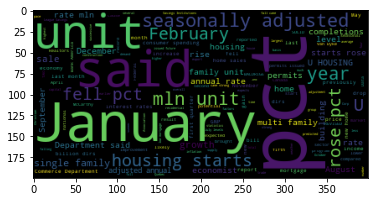

In [307]:
wd = WordCloud()
wd.generate(" ".join([word for word in housing_words if word.isalpha() and word.lower() not in stopwords_set]))
plt.imshow(wd);

In [311]:
["Life is what happens when you're busy making other plans.".replace('\"', "\'")

AttributeError: 'list' object has no attribute 'replace'

In [313]:
counter.most_common(5)

[('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915)]

In [318]:
L = ['a', 'the', 'b', 'eeek']

In [319]:
sorted(L, key=lambda x: x[-1])

['a', 'b', 'the', 'eeek']

In [320]:
nym_lexicon= {"big": {"syn":["large", "huge"], "ant":["small"]},
              "dumb": {"syn":["stupid"], "ant":["smart"]},
              "automatic": {"syn":[], "ant":["manual"]}}


In [327]:
syn_set = set()
for word in nym_lexicon:
    for syn in nym_lexicon[word]['syn']:
        syn_set.add((word, syn))

In [328]:
syn_set

{('big', 'huge'), ('big', 'large'), ('dumb', 'stupid')}

In [338]:
"'mys'".strip("'")

'mys'